In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings('ignore')
df=pd.read_csv('/kaggle/input/medical-insurance-cost-dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


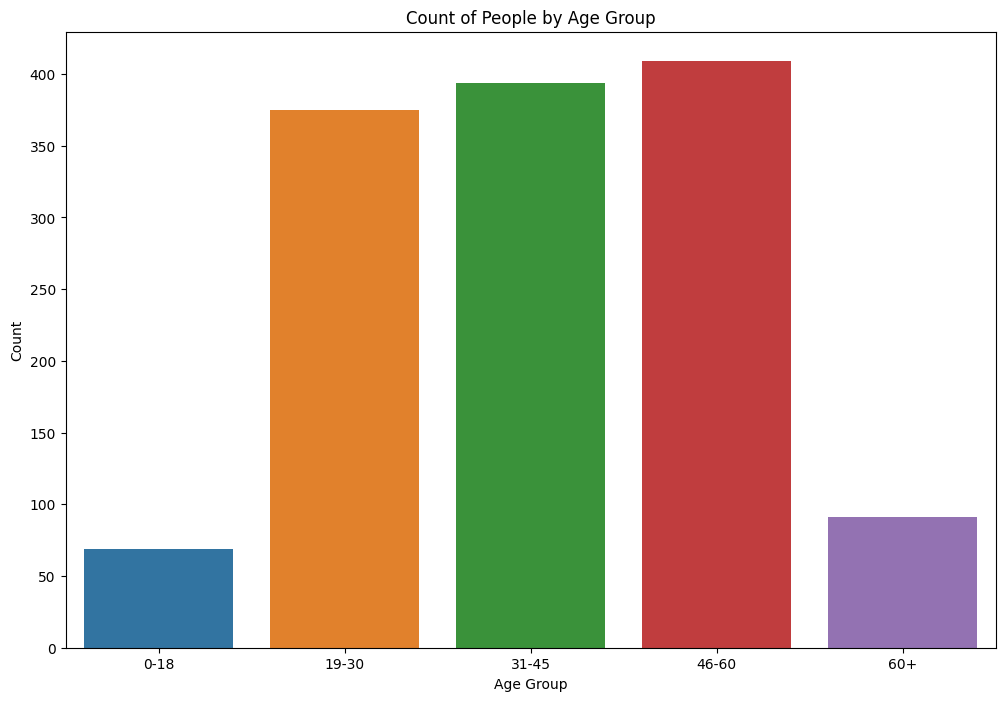

In [2]:
# Create age categories
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 30, 45, 60, 100], 
                         labels=['0-18', '19-30', '31-45', '46-60', '60+'])

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='age_group', data=df)
plt.title('Count of People by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

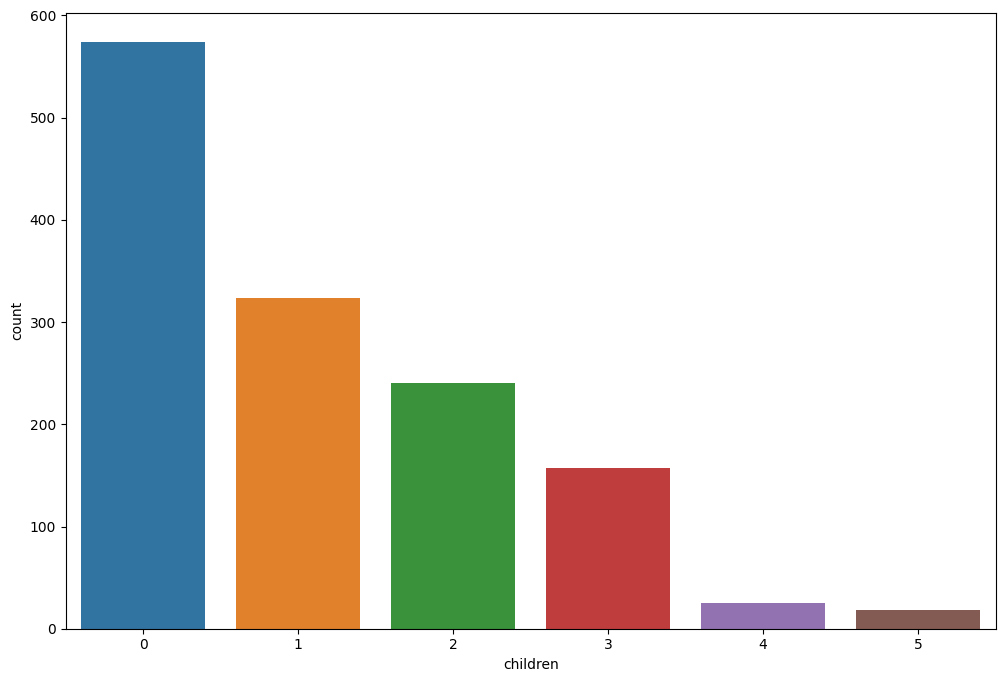

In [3]:
plt.figure(figsize=(12, 8))
sns.countplot(x='children', data=df)
plt.show()

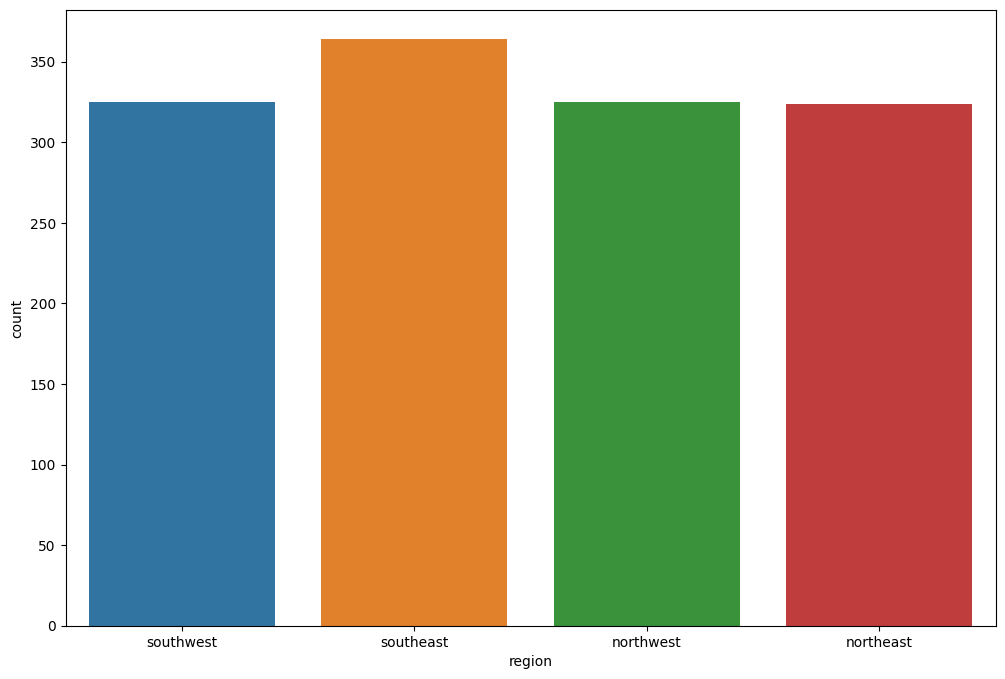

In [4]:
plt.figure(figsize=(12, 8))
sns.countplot(x='region', data=df)
plt.show()

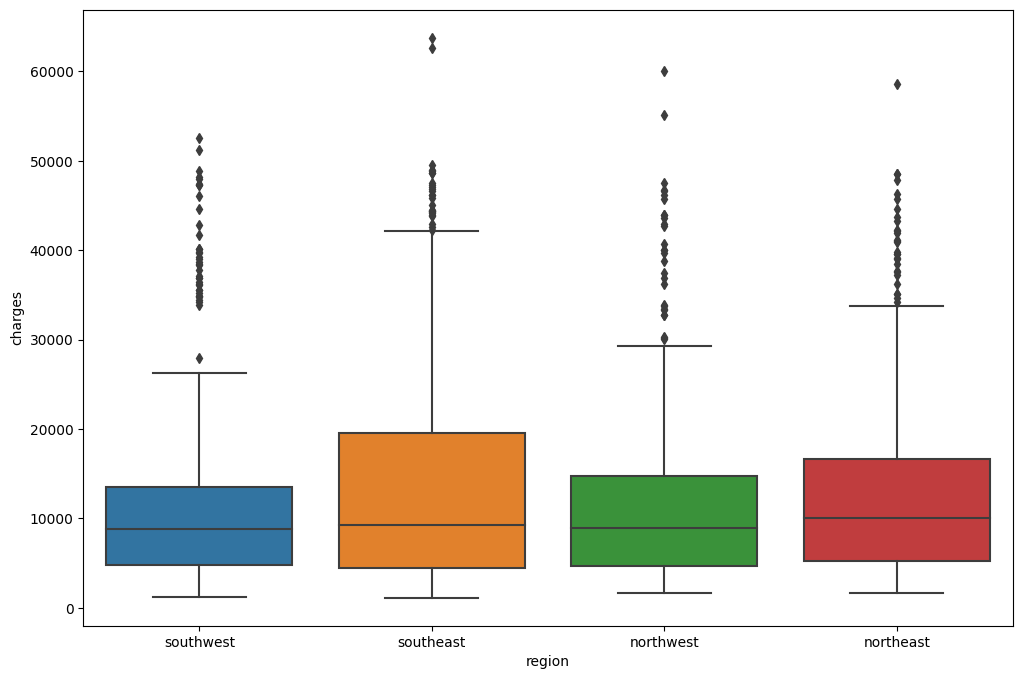

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='region',y='charges', data=df)
plt.show()

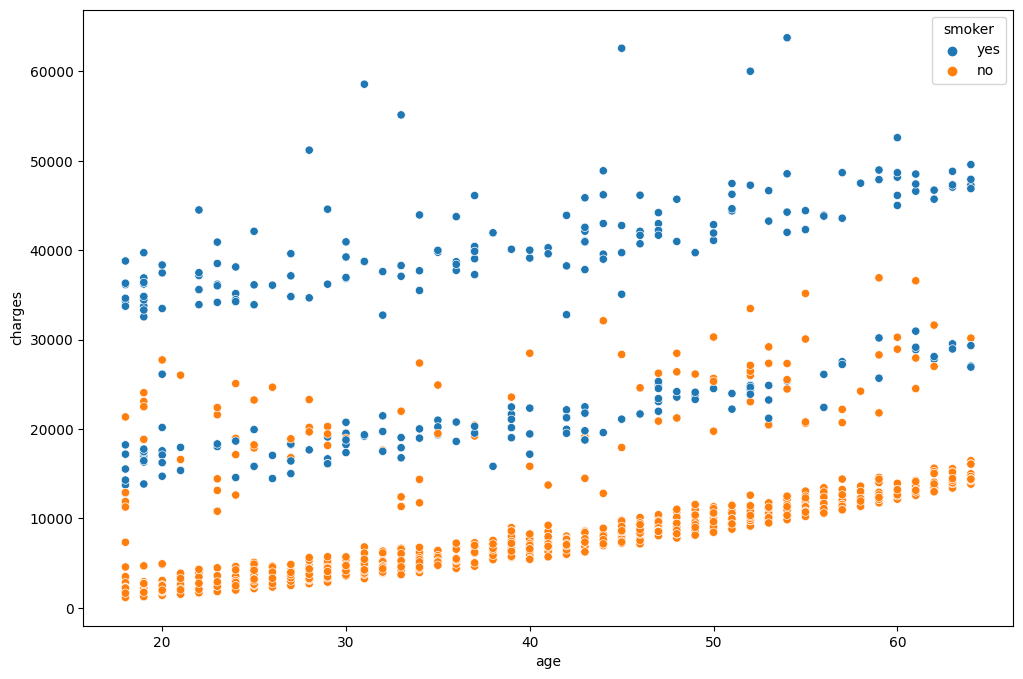

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age',y='charges',hue='smoker',data=df)
plt.show()

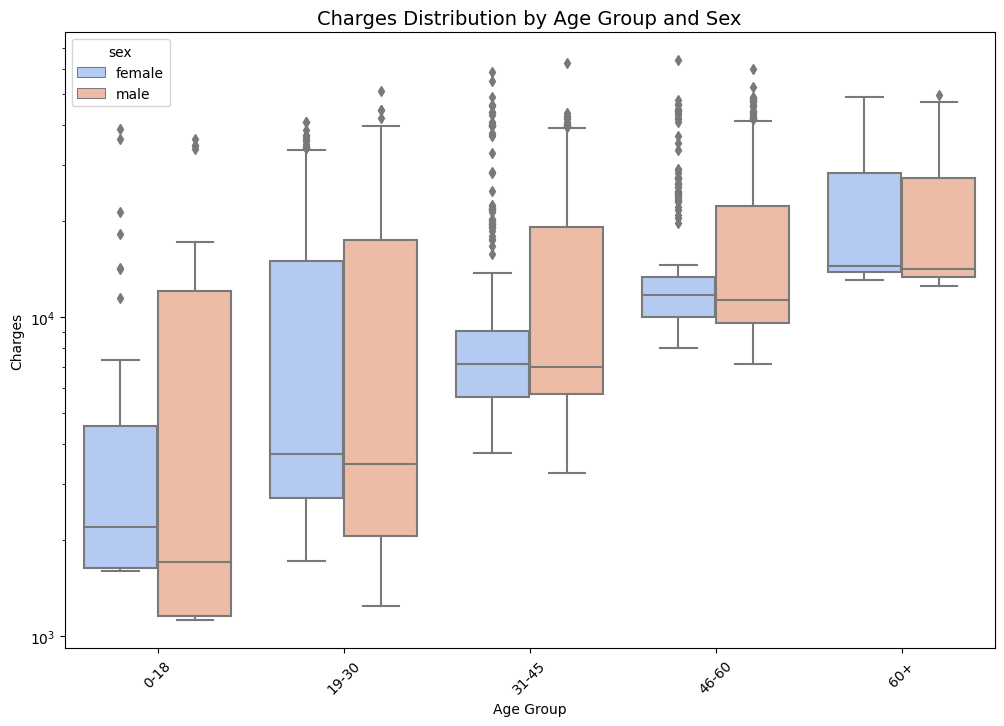

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', hue='sex', data=df, palette='coolwarm')
plt.title('Charges Distribution by Age Group and Sex', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.yscale('log')  # Use logarithmic scale
plt.xticks(rotation=45)
plt.show()

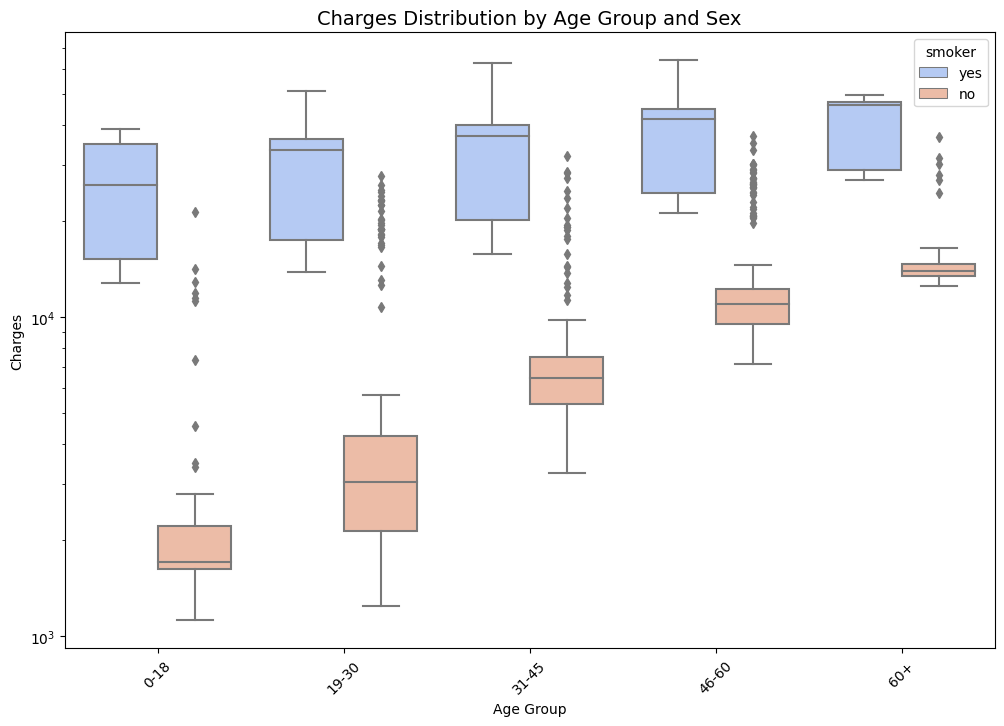

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('Charges Distribution by Age Group and Sex', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.yscale('log')  # Use logarithmic scale
plt.xticks(rotation=45)
plt.show()

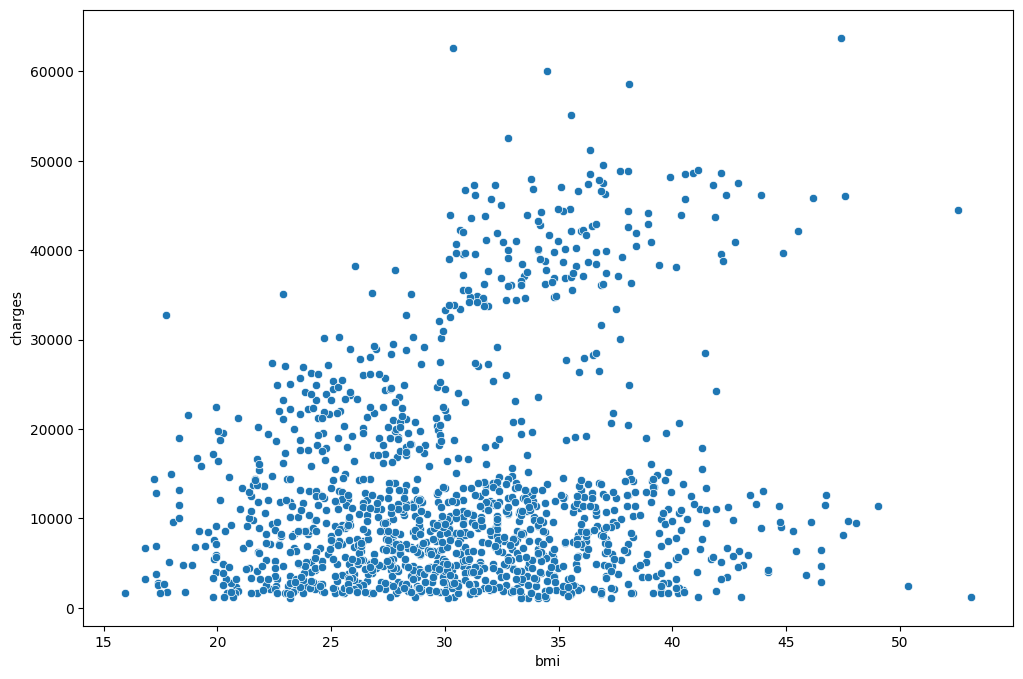

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.show()

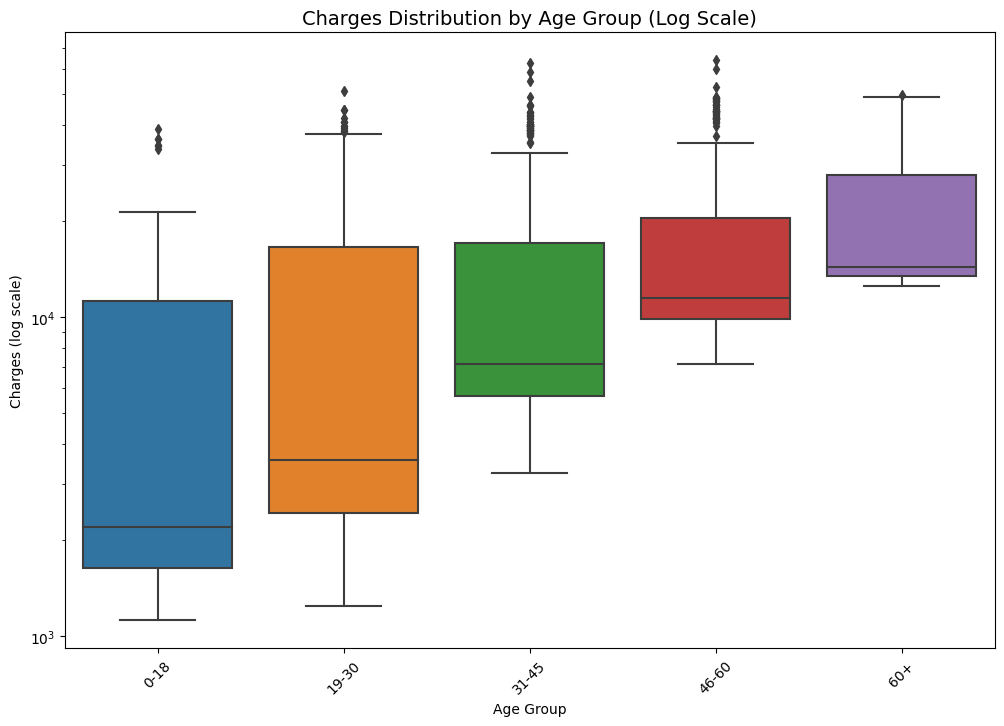

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', data=df)
plt.yscale('log')  # Use logarithmic scale
plt.title('Charges Distribution by Age Group (Log Scale)', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Charges (log scale)')
plt.xticks(rotation=45)
plt.show()

In [11]:
X = df.drop('charges', axis=1)
y = df['charges']

# Identify column types
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi','children']

In [12]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with model
model_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])),
    ('model', XGBRegressor(
    n_estimators=100,       # number of boosting rounds (trees)
    learning_rate=0.1,     # step size shrinkage (default=0.1)
    max_depth=2,            # maximum depth of a tree
    subsample=0.8,          # fraction of samples used per tree
    colsample_bytree=0.8,   # fraction of features used per tree
    reg_alpha=0.001,          # L1 regularization (Lasso)
    reg_lambda=0.010,         # L2 regularization (Ridge)
    min_child_weight=2,     # min sum of instance weight needed in a child
    gamma=0,                # min loss reduction required to split
    ))
])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_s...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=2, max_leaves=None, min_child_weight=2,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

In [13]:
score = model_pipeline.score(X_test, y_test)

print(f"Mean Absolute Error : {mean_absolute_error(y_test, model_pipeline.predict(X_test)):.3f}")
print(f"Mean Squared Error : {mean_squared_error(y_test, model_pipeline.predict(X_test)):.3f}")
print(f"R² Score : {score:.3f}")

Mean Absolute Error : 2408.047
Mean Squared Error : 18142928.404
R² Score : 0.883


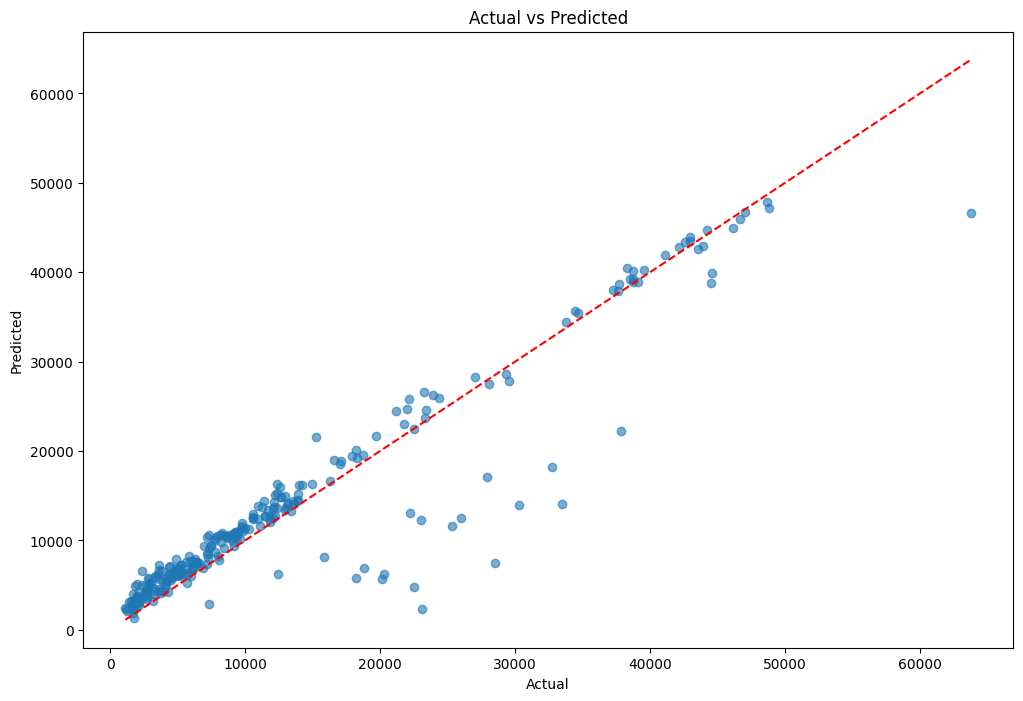

In [14]:
y_pred = model_pipeline.predict(X_test)
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

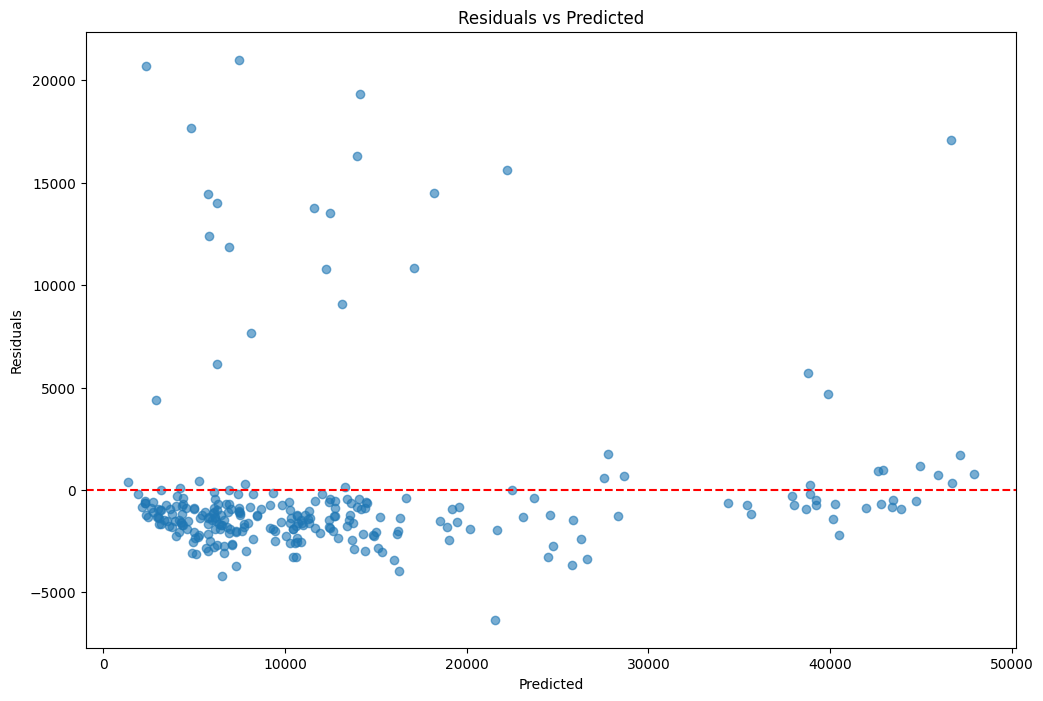

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

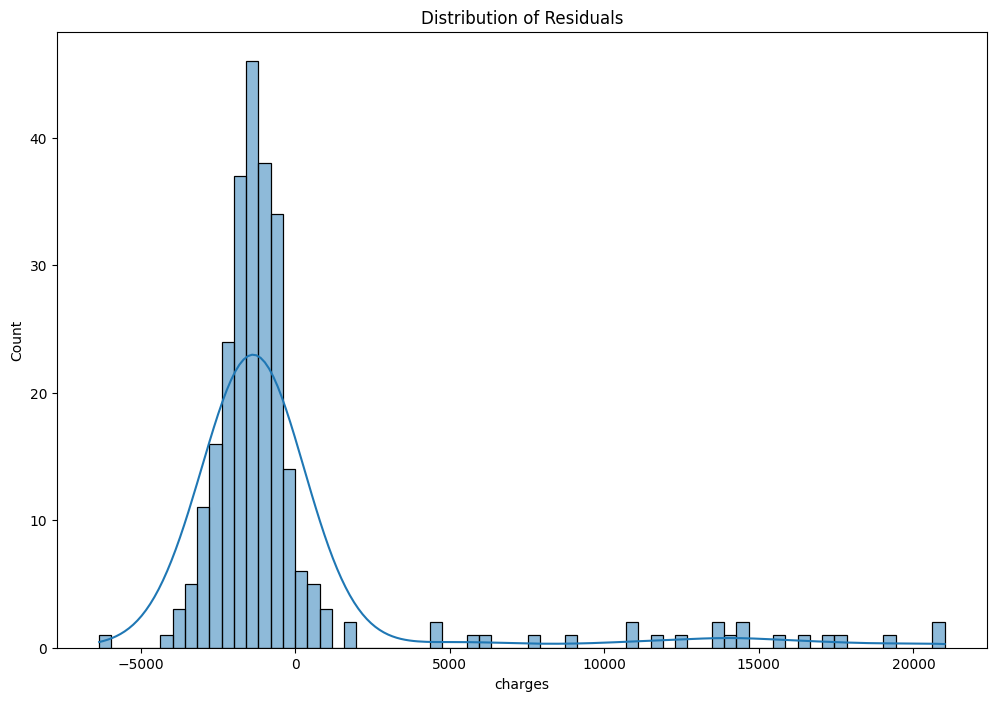

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

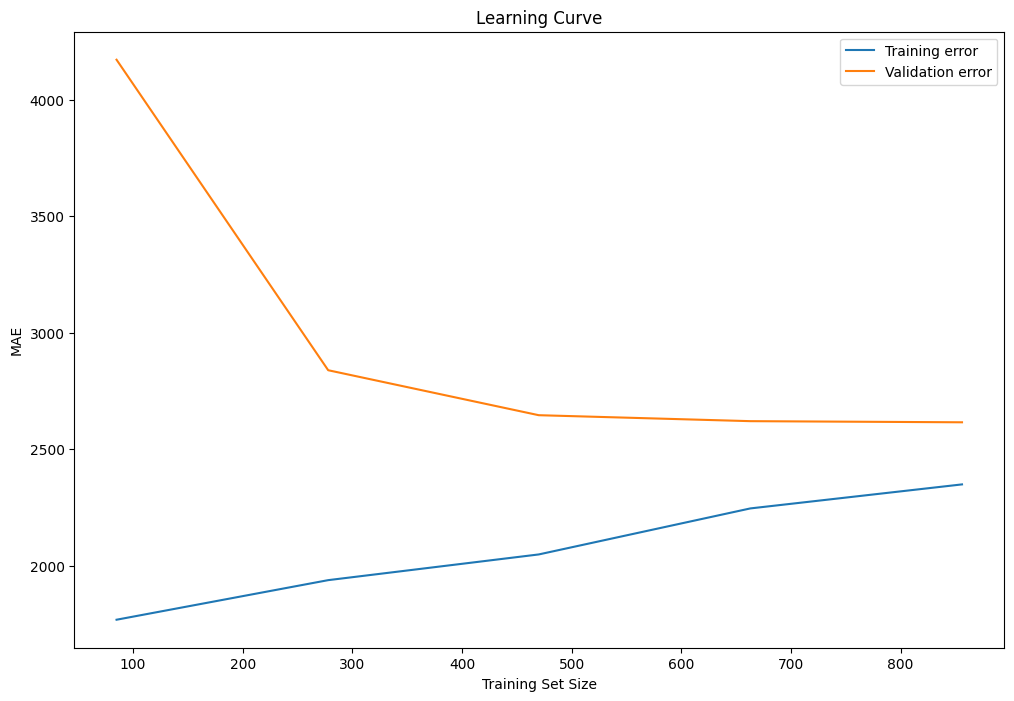

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model_pipeline, X_train, y_train, cv=5, scoring="neg_mean_absolute_error"
)

train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label="Training error")
plt.plot(train_sizes, test_mean, label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("MAE")
plt.title("Learning Curve")
plt.legend()
plt.show()